In [80]:
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
# %matplotlib inline

In [81]:
global_data23 = Dataset("./dataset/NCEP/NCEP-Global-tmax-4x-daily/tmax.2m.gauss.2023.nc", "r")

In [82]:
print(global_data23.data_model)

NETCDF4_CLASSIC


In [83]:
global_data23

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: 4x Daily NCEP/DOE Reanalysis 2
    comments: Data is from 
NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
(4x/day).  Data interpolated from model (sigma) surfaces to gaussian grid.
    platform: Model
    source: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution: National Centers for Environmental Prediction
    dataset_title: NCEP-DOE AMIP-II Reanalysis
    References: https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html
    source_url: http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history: created 2021/02 by NOAA/ESRL/PSD
Converted to chunked, deflated non-packed NetCDF4 2020/05
    dimensions(sizes): lon(192), lat(94), level(1), time(1460), nbnds(2)
    variables(dimensions): float32 level(level), float32 lat(lat), float32 lon(lon), float64 time(time), float32 tmax(time, level, lat, lon), float64 time_bnds(time, nbnds

In [84]:
global_data23.variables.keys()

dict_keys(['level', 'lat', 'lon', 'time', 'tmax', 'time_bnds'])

In [85]:
lat = global_data23.variables['lat'][:]
lon = global_data23.variables['lon'][:]
time = global_data23.variables['time'][:]
tmax = global_data23.variables['tmax'][:]

In [86]:
type(lat), type(lon), type(time), type(tmax)

(numpy.ma.core.MaskedArray,
 numpy.ma.core.MaskedArray,
 numpy.ma.core.MaskedArray,
 numpy.ma.core.MaskedArray)

In [87]:
map = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

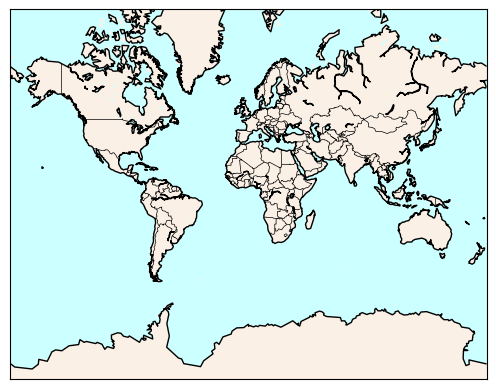

In [88]:
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

{-180.0: ([<matplotlib.lines.Line2D at 0x3c5734eb0>],
  [Text(37616.041020431396, -376160.410204314, '180°'),
   Text(37578424.97941096, -376160.410204314, '180°')]),
 -165.0: ([<matplotlib.lines.Line2D at 0x3c5721130>],
  [Text(1579873.7228581186, -376160.410204314, '165°W')]),
 -150.0: ([<matplotlib.lines.Line2D at 0x3c57213d0>],
  [Text(3159747.445716237, -376160.410204314, '150°W')]),
 -135.0: ([<matplotlib.lines.Line2D at 0x3c5721670>],
  [Text(4739621.168574356, -376160.410204314, '135°W')]),
 -120.0: ([<matplotlib.lines.Line2D at 0x3c5721910>],
  [Text(6281878.850412043, -376160.410204314, '120°W')]),
 -105.0: ([<matplotlib.lines.Line2D at 0x3c5721bb0>],
  [Text(7861752.573270162, -376160.410204314, '105°W')]),
 -90.0: ([<matplotlib.lines.Line2D at 0x3c5721e50>],
  [Text(9441626.29612828, -376160.410204314, '90°W')]),
 -75.0: ([<matplotlib.lines.Line2D at 0x3c5742130>],
  [Text(10983883.977965968, -376160.410204314, '75°W')]),
 -60.0: ([<matplotlib.lines.Line2D at 0x3c57423d0>],

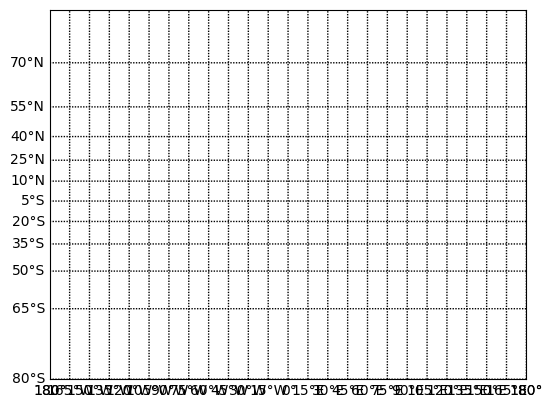

In [89]:
parallels = np.arange(-80,80,15.) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-180,180,15.) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)


In [90]:
len(lat), len(lon), len(time), tmax.shape

(94, 192, 1460, (1460, 1, 94, 192))

In [91]:
# tmax is currently of shape (1460, 1, 94, 192), we need to reshape it to (1460, 94, 192)
# tmax = tmax.reshape(tmax.shape[0], tmax.shape[2], tmax.shape[3])

In [92]:
lons,lats= np.meshgrid(lon-180,lat)

In [93]:
x,y = map(lons,lats)

TypeError: Input z must be 2D, not 3D

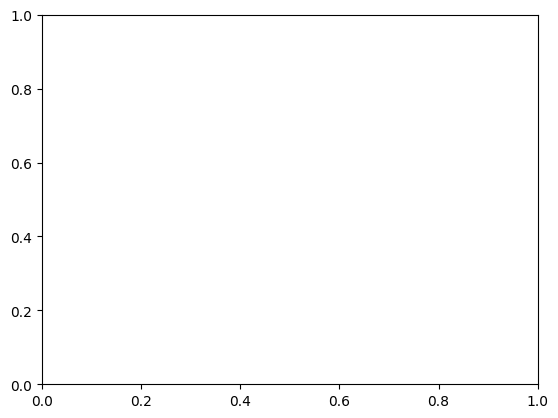

In [94]:
clevs = np.arange(960,1040,4)
cs = map.contour(x,y,tmax[0,:,:])